<div align="center"><h1> Projet Data Science </h1></div>
<div align="center"><h2> Classification d'assertions selon leur valeurs de véracité ( automatic fact-checking ) </h2></div>

<div class="alert alert-block alert-info" align="center">
    <h1>
        Executing the basic
    </h1>
</div>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
import nltk
import pickle
import unicodedata
import inflect
import re
import time
import contractions

from enum import Enum
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

warnings.filterwarnings("ignore", category = FutureWarning)

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
    
try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger')

# Compte rendu de classification
def cpt_mal_classes(y_test_func, result_func):
    nb_func = 0
    for i in range(len(y_test_func)):
        if y_test_func[i] != result_func[i]:
            nb_func += 1
    print (f'Taille des données {len(y_test_func)} mal classés {nb_func}\n')

<div class="alert alert-block alert-info" align="center">
    <h1>
        Classification
    </h1>
</div>

## Reading the transformed data for the classification

In [26]:
df = pd.read_csv('attemps/tfcleandownsample2.csv', sep = ';')
display(df)

,abbott,abe,able,abortion,abruin,abuse,academy,accept,accepted,accepts,...,youn,yous,youth,yvette,zero,Source_africacheck,Source_politifact,Source_snopes,Source_truthorfiction,RatingName
0,-0.085331,-0.060302,-0.060302,-0.084286,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,...,-0.060302,-0.268617,-0.060302,-0.060302,-0.20186,0,0,1,0,0
1,-0.085331,-0.060302,-0.060302,-0.084286,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,...,-0.060302,-0.268617,-0.060302,-0.060302,-0.20186,0,0,1,0,0
2,-0.085331,-0.060302,-0.060302,-0.084286,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,...,-0.060302,-0.268617,-0.060302,-0.060302,-0.20186,0,0,1,0,0
3,-0.085331,-0.060302,-0.060302,-0.084286,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,...,-0.060302,-0.268617,-0.060302,-0.060302,-0.20186,1,0,0,0,0
4,-0.085331,-0.060302,-0.060302,-0.084286,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,...,-0.060302,-0.268617,-0.060302,-0.060302,-0.20186,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,-0.085331,-0.060302,-0.060302,-0.084286,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,...,-0.060302,-0.268617,-0.060302,-0.060302,-0.20186,0,1,0,0,1
272,-0.085331,-0.060302,-0.060302,-0.084286,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,...,-0.060302,-0.268617,-0.060302,-0.060302,-0.20186,0,0,1,0,1
273,-0.085331,-0.060302,-0.060302,-0.084286,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,...,-0.060302,-0.268617,-0.060302,-0.060302,-0.20186,0,1,0,0,1
274,-0.085331,-0.060302,-0.060302,-0.084286,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,-0.060302,...,-0.060302,-0.268617,-0.060302,-0.060302,-0.20186,0,1,0,0,1


## Define the learning variables and the variable to predict

In [3]:
array = df.values
X = array[:,0:-1]
y = array[:,-1]

## Cut the data set into a test set and a learning set

In [4]:
myTrainSize = 0.3 # 30% du jeu de données pour le test
myTestSize = 1 - myTrainSize # 70% du jeu de données pour l'entraînement
seed = 30

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = myTrainSize, random_state = seed, test_size = myTestSize)

<div align="center">
    <h1>
        Testing the first classifier on attemp 1
    </h1>
</div>

## GaussianNB classifier

In [5]:
clfGaussianNB = GaussianNB()

clfGaussianNB.fit(X_train, y_train)

resultGaussianNB = clfGaussianNB.predict(X_test)

print(f'accuracy : {accuracy_score(resultGaussianNB, y_test)}')

accuracy : 0.6581196581196581


## Display the confusion matrix and the classification report

In [6]:
print (f'Matrice de confusion :\n{confusion_matrix(y_test, resultGaussianNB)}')
print (f'Classification report :\n{classification_report(y_test, resultGaussianNB)}')

Matrice de confusion :
[[210  42]
 [ 78  21]]
Classification report :
              precision    recall  f1-score   support

         0.0       0.73      0.83      0.78       252
         1.0       0.33      0.21      0.26        99

    accuracy                           0.66       351
   macro avg       0.53      0.52      0.52       351
weighted avg       0.62      0.66      0.63       351



## Cross validate with 10 splits (Kfold)

In [7]:
seed = 7
myKFold = KFold(n_splits = 10, shuffle = True, random_state = seed)

## Apply the GaussianNB classifier and give the different accuracy for the 10 evaluations

In [8]:
clfGaussianNB = GaussianNB()

myScoring = 'accuracy'

score = cross_val_score(clfGaussianNB, X, y, cv = myKFold, scoring = myScoring)

print(f'Les différentes accuracy pour les 10 évaluations sont :\n{score}')
print(f'Accuracy moyenne : {score.mean()} | Standard deviation : {score.std()}')

Les différentes accuracy pour les 10 évaluations sont :
[0.62745098 0.66       0.74       0.62       0.56       0.48
 0.66       0.56       0.7        0.66      ]
Accuracy moyenne : 0.6267450980392157 | Standard deviation : 0.07211140938382635


<div align="center">
    <h1>
        Testing several classifiers
    </h1>
</div>

In [9]:
models = []

models.append(('KNN', KNeighborsClassifier()))      # GS Done
models.append(('CART', DecisionTreeClassifier()))   # GS Done
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))                       # GS Done
models.append(('RFO', RandomForestClassifier()))    # GS Done
models.append(('LR', LogisticRegression()))
models.append(('LSVC', LinearSVC(dual = False)))

## Without shuffle

In [10]:
seed = 7
myScoring = 'accuracy'
scores = []
names = []

for name, model in models:
    myKFold = KFold(n_splits = 10, random_state = seed)
    startTime = time.time()
    score = cross_val_score(model, X, y, cv = myKFold, scoring = myScoring)
    endTime = time.time()
    scores.append(score)
    names.append(name)
    print(f'{name}\t({score.mean():.2f} | {score.std():.2f} | Time : {endTime - startTime:.2f})\n')

KNN	(0.72 | 0.04 | Time : 1.97)

CART	(0.67 | 0.03 | Time : 3.90)

NB	(0.62 | 0.06 | Time : 0.72)

SVC	(0.72 | 0.04 | Time : 16.40)

RFO	(0.72 | 0.05 | Time : 1.56)

LR	(0.32 | 0.05 | Time : 4.17)

LSVC	(0.30 | 0.05 | Time : 103.85)



## Displaying results of the different classifiers

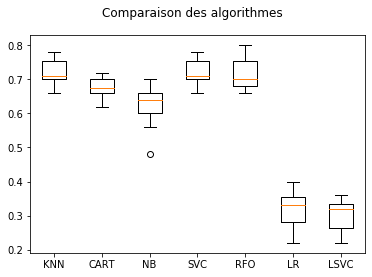

In [11]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)
plt.show()

## With shuffle

In [12]:
scores = []
names = []

for name, model in models:
    myKFold = KFold(n_splits = 10, shuffle = True, random_state = seed)
    startTime = time.time()
    score = cross_val_score(model, X, y, cv = myKFold, scoring = myScoring)
    endTime = time.time()
    scores.append(score)
    names.append(name)
    print(f'{name}\t({score.mean():.2f} | {score.std():.2f} | Time : {endTime - startTime:.2f})\n')

KNN	(0.72 | 0.07 | Time : 2.56)

CART	(0.66 | 0.04 | Time : 5.77)

NB	(0.63 | 0.07 | Time : 0.63)

SVC	(0.72 | 0.07 | Time : 14.48)

RFO	(0.72 | 0.06 | Time : 1.05)

LR	(0.31 | 0.07 | Time : 2.92)

LSVC	(0.30 | 0.07 | Time : 123.43)



## Displaying results of the different classifiers

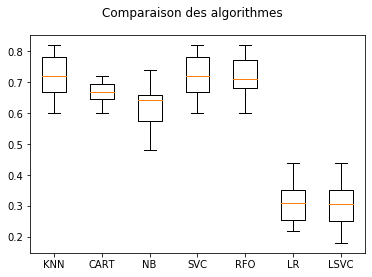

In [13]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)
plt.show()

## Apply GridSearchCV to RandomForestClassifier

In [14]:
gridParam = {'n_estimators': [4, 6, 9], 
             'max_features': ['log2', 'sqrt','auto'], 
             'criterion': ['entropy', 'gini'], 
             'max_depth': [2, 3, 5, 10], 
             'min_samples_split': [2, 3, 5], 
             'min_samples_leaf': [1, 5, 8]
            }

myScoring = 'accuracy'

clfGridSearchCV = GridSearchCV(estimator = RandomForestClassifier(), param_grid = gridParam, scoring = myScoring, cv = 5, n_jobs = -1, iid = True, return_train_score = True)

startTime = time.time()
clfGridSearchCV.fit(X_train, y_train)
endTime = time.time()

print(f'temps : {endTime - startTime:.2f}')
print(f'meilleur score : {clfGridSearchCV.best_score_:.2f}')
print(f'meilleurs paramètres :\n{clfGridSearchCV.best_params_}')
print(f'meilleur estimateur :\n{clfGridSearchCV.best_estimator_}')

# tf1
# {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 6}
# {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 6}
# {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 9}
# {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}

#tf2
# {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}

temps : 58.45
meilleur score : 0.74
meilleurs paramètres :
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 6}
meilleur estimateur :
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## Apply GridSearchCV to DecisionTreeClassifier

In [15]:
gridParam = {'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
             'criterion' : ['gini', 'entropy'], 
             'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
            }

myScoring = 'accuracy'

clfGridSearchCV = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = gridParam, scoring = myScoring, cv = 10, n_jobs = -1, iid = True, return_train_score = True)

startTime = time.time()
clfGridSearchCV.fit(X_train, y_train)
endTime = time.time()

print(f'temps : {endTime - startTime:.2f}')
print(f'meilleur score : {clfGridSearchCV.best_score_:.2f}')
print(f'meilleurs paramètres :\n{clfGridSearchCV.best_params_}')
print(f'meilleur estimateur :\n{clfGridSearchCV.best_estimator_}')

#tf1
# {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}
# {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6}
# {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 5}
# {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}

#tf2
# {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4}

temps : 25.84
meilleur score : 0.73
meilleurs paramètres :
{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1}
meilleur estimateur :
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


## Apply GridSearchCV to SVC

In [16]:
gridParam = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
             'gamma' : ['scale', 0.0001, 0.001, 0.01, 0.1, 1], 
             'kernel' : ['linear', 'poly', 'rbf']
            }

myScoring = 'accuracy'

clfGridSearchCV = GridSearchCV(estimator = SVC(), param_grid = gridParam, scoring = myScoring, cv = 5, n_jobs = 1, iid = True, return_train_score = True)

startTime = time.time()
clfGridSearchCV.fit(X_train, y_train)
endTime = time.time()

print(f'temps : {endTime - startTime:.2f}')
print(f'meilleur score : {clfGridSearchCV.best_score_:.2f}')
print(f'meilleurs paramètres :\n{clfGridSearchCV.best_params_}')
print(f'meilleur estimateur :\n{clfGridSearchCV.best_estimator_}')

#tf2
# {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

temps : 166.85
meilleur score : 0.73
meilleurs paramètres :
{'C': 0.001, 'gamma': 'scale', 'kernel': 'linear'}
meilleur estimateur :
SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


## Apply GridSearchCV to KNeighborsClassifier

In [17]:
gridParam = {'n_neighbors': list(range(1,15)), 
              'metric': ['minkowski', 'euclidean', 'manhattan']
             }

myScoring = 'accuracy'
                        
clfGridSearchCV = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = gridParam, scoring = myScoring, cv = 5, n_jobs = -1, iid = True, return_train_score = True)

startTime = time.time()
clfGridSearchCV.fit(X_train, y_train)
endTime = time.time()

print(f'temps : {endTime - startTime:.2f}')
print(f'meilleur score : {clfGridSearchCV.best_score_:.2f}')
print(f'meilleurs paramètres :\n{clfGridSearchCV.best_params_}')
print(f'meilleur estimateur :\n{clfGridSearchCV.best_estimator_}')

temps : 17.60
meilleur score : 0.73
meilleurs paramètres :
{'metric': 'minkowski', 'n_neighbors': 2}
meilleur estimateur :
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')


## Do a gridsearch taking the previous parameters

In [18]:
classifiers = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

params = {
    'RandomForestClassifier' : [
        {'n_estimators' : [9, 6]}, 
        {'max_features' : ['auto', 'sqrt', 'log2']}, 
        {'criterion' : ['entropy', 'gini']}, 
        {'max_depth' : [10]}, 
        {'min_samples_split' : [2, 5]}, 
        {'min_samples_leaf' : [1, 5]}
    ], 
    'DecisionTreeClassifier' : [
        {'max_depth' : [9, 8]}, 
        {'criterion' : ['gini', 'entropy']}, 
        {'min_samples_leaf' : [1, 2, 3]}
    ],
    'SVC' : [
        {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, 
        {'gamma': ['scale', 0.0001, 0.001, 0.01, 0.1, 1]}, 
        {'kernel': ['linear', 'poly', 'rbf']}
    ],
    'KNeighborsClassifier' : [
        {'metric': ['minkowski', 'manhattan']}, 
        {'n_neighbors': [1, 2]}
    ]
}

In [19]:
class Result:
    def __init__(self, name, score, parameters, duration):
        self.name = name
        self.score = score
        self.parameters = parameters
        self.duration = duration
    def __repr__(self):
        return repr((self.name, self.score, self.parameters, self.duration))

results = []
myScoring = 'accuracy'

for key, value in classifiers.items():
    clfGridSearchCV = GridSearchCV(estimator = value, param_grid = params[key], scoring = myScoring, cv = 10, n_jobs = 1, iid = True)
    startTime = time.time()
    clfGridSearchCV.fit(X_train, y_train)
    endTime = time.time()
    result = Result(key, clfGridSearchCV.best_score_, clfGridSearchCV.best_estimator_, endTime - startTime)
    results.append(result)

results = sorted(results, key = lambda result: result.score, reverse = True)

print(f'')
print(f'Le meilleur resultat est celui du classifieur {results[0].name} :\n\tScore : {results[0].score:.2f}\n\tDuration : {results[0].duration:.2f}\n\tParameters :\n\t\t{results[0].parameters}')

print(f'\nTous les résultats :\n')
for result in results:
    print(f'\t{result.name} classifier :\n\tScore : {result.score:.2f}\n\tDuration : {result.duration:.2f}\n\tParameters :\n\t\t{result.parameters}\n')


Le meilleur resultat est celui du classifieur RandomForestClassifier :
	Score : 0.74
	Duration : 6.87
	Parameters :
		RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Tous les résultats :

	RandomForestClassifier classifier :
	Score : 0.74
	Duration : 6.87
	Parameters :
		RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_sampl

## Save the best learned model

In [20]:
pickle.dump(results[0].parameters, open('modeles/best.sav', 'wb'))

## Create pipeline

In [21]:
#pipeline = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components = 2)), ('clf', DecisionTreeClassifier(random_state = 42))])
#pipeline = Pipeline([('vect', MinMaxScaler()), ('clf', SVC(gamma = 'scale'))])

## Reload the best model to test it with y_test

In [22]:
clf_loaded = pickle.load(open('modeles/best.sav', 'rb'))

print(f'Modèle chargé :\n{clf_loaded}\n')

result = clf_loaded.predict(X_test)

cpt_mal_classes(y_test, result)

print(f'Accuracy : {accuracy_score(result, y_test):.2f}\n')
print(f'Matrice de confusion :\n{confusion_matrix(y_test, result)}\n')
print(f'Classification report :\n{classification_report(y_test, result)}')

Modèle chargé :
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Taille des données 351 mal classés 99

Accuracy : 0.72

Matrice de confusion :
[[250   2]
 [ 97   2]]

Classification report :
              precision    recall  f1-score   support

         0.0       0.72      0.99      0.83       252
         1.0       0.50      0.02      0.04        99

    accuracy                           0.72       351
   macro avg       0.61      0.51      0.44       351
weighted avg       0.66      0.72      0.61       351

